In [161]:
import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import pandas as pd
import numpy as np
import os
import shutil

In [162]:
torch.cuda.set_device(0)
device = torch.device("cuda")

def set_all_seeds(seed):
    os.environ["PL_GLOBAL_SEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_all_seeds(42)

# Oversampling

In [163]:
from tqdm import tqdm
def check_classes_amount(set_with_labels):
    counter = [1,0,0,0,0,0,0,0,0,0,
               0,0,0,0,0,0,0,0,0,0,
               0,0,0,0,0,0,0,0,0,0,
               0,0,0,0,0,0,0,0,0,0,
               0,0,0,0,0,0,0,0,0,0]
    count = 0
    for j in tqdm(range(88010)):
        if set_with_labels[j][1] == set_with_labels[j+1][1]:
            counter[count] = counter[count] + 1
        else:
            count += 1
            counter[count] = counter[count] + 1

    return counter

In [164]:
import random

def over_sample_bread_carbon():
    classes_amounts = check_classes_amount(trainset)
    sub_folders = os.listdir("./train")
    list_of_images_bread = os.listdir(f"./train/{sub_folders[10]}")
    list_of_images_carbon = os.listdir(f"./train/{sub_folders[13]}")

    to_oversample_bread = random.sample(list_of_images_bread, k=(1800 - classes_amounts[10]))
    to_oversample_carbon = random.sample(list_of_images_carbon, k= (1800 - 3 * classes_amounts[13]))

    # oversample bread class
    for i in range(len(to_oversample_bread)):
        shutil.copy(f"./train/{sub_folders[10]}/{to_oversample_bread[i]}", f"./train/{sub_folders[10]}/{[name[:-5] + '_1' + name[-5:] for name in to_oversample_bread][i]}")

    # oversample carbon class
    for i in range(classes_amounts[13]):
        shutil.copy(f"./train/{sub_folders[13]}/{list_of_images_carbon[i]}", f"./train/{sub_folders[13]}/{[name[:-5] + '_1' + name[-5:] for name in list_of_images_carbon][i]}")

    for i in range(classes_amounts[13]):
        shutil.copy(f"./train/{sub_folders[13]}/{list_of_images_carbon[i]}", f"./train/{sub_folders[13]}/{[name[:-5] + '_2' + name[-5:] for name in list_of_images_carbon][i]}")

    for i in range(len(to_oversample_carbon)):
        shutil.copy(f"./train/{sub_folders[13]}/{to_oversample_carbon[i]}", f"./train/{sub_folders[13]}/{[name[:-5] + '_3' + name[-5:] for name in to_oversample_carbon][i]}")

In [165]:
trainset = datasets.ImageFolder("train/")
# over_sample_bread_carbon()

100%|██████████| 88010/88010 [00:46<00:00, 1905.21it/s]


# Create val folder

In [166]:
def create_val_folder():
    sub_folders = os.listdir("./train")
    os.mkdir("./val")
    for sub_folder in sub_folders:
        os.mkdir(f"./val/{sub_folder}")

    for sub_folder in sub_folders:
        to_move = random.sample(os.listdir(f"./train/{sub_folder}"), k=360)
        for image in to_move:
            shutil.move(f"./train/{sub_folder}/{image}", f"./val/{sub_folder}/{image}")

# create_val_folder()

# Data preparation

In [168]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32


In [169]:
trainset = datasets.ImageFolder("train/", transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

valset = datasets.ImageFolder("val/", transform=transform)
valloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

testset = datasets.ImageFolder("test_all/", transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

classes = tuple(trainset.classes)

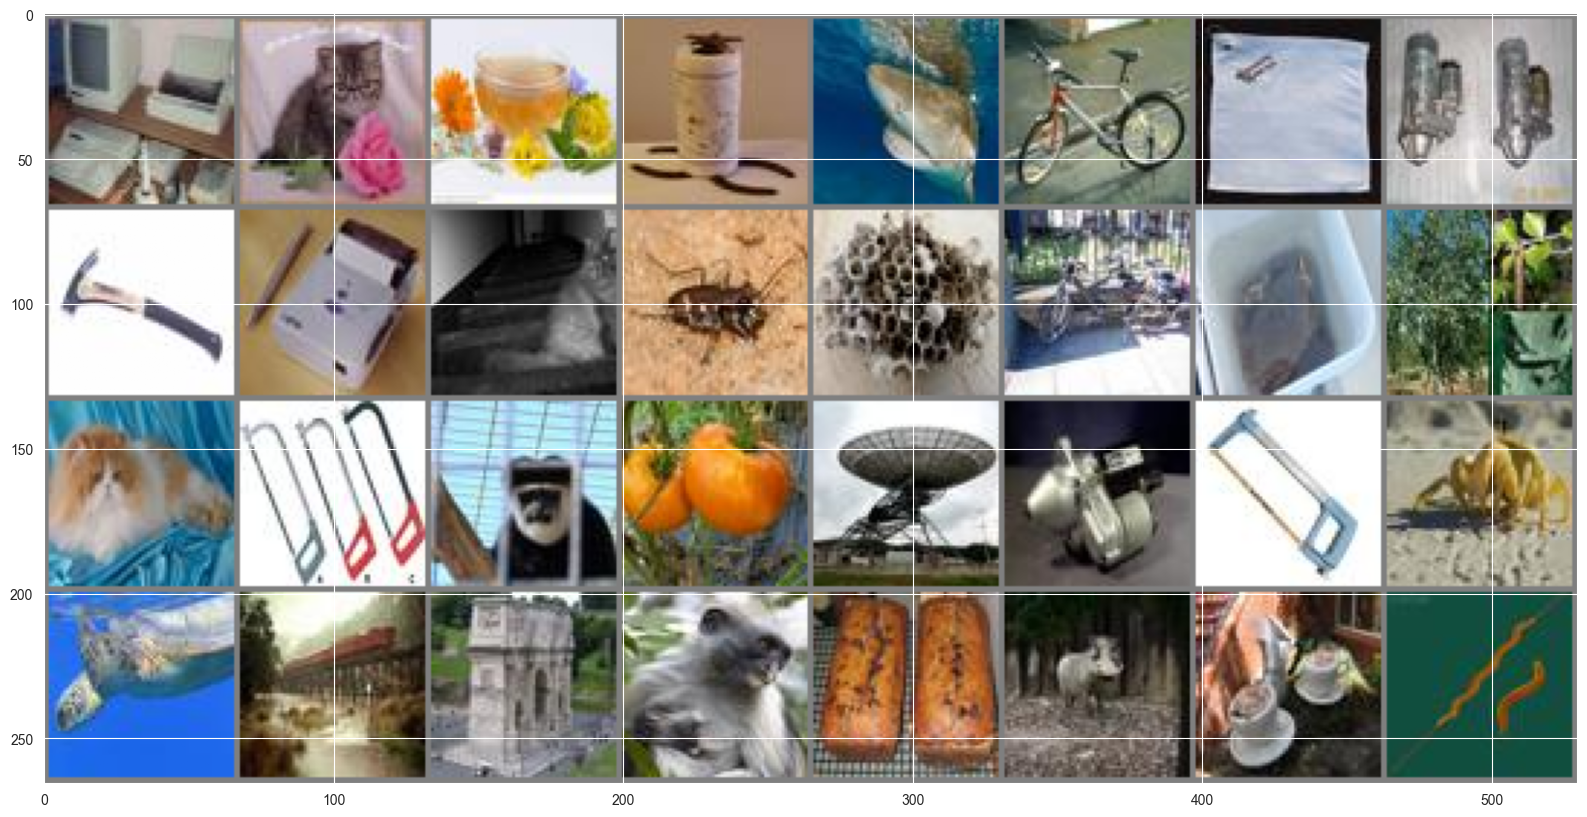

printer   cat   tea towel  fish bicycle towel motor hammer printer   cat beetle  nest bicycle  crab birch   cat   saw monkey tomato antenna motor   saw  crab turtle bridge memorial monkey bread swine   pot bacteria


In [170]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (20,10))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [172]:
images[0:1].size()

torch.Size([1, 3, 64, 64])